<a href="https://colab.research.google.com/github/ashmeenkhaira/malaria-detection-CNN-model/blob/main/malaria_detecction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns # visualisation
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer,BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam


In [2]:
dataset,dataset_info=tfds.load('malaria', with_info=True,as_supervised=True, shuffle_files=True,split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.U534FI_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [4]:
def split(dataset,train_R, val_R, test_R):
  size = len(list(dataset))
  train_data = dataset.take(int(size*train_R))
  val_data = dataset.skip(int(size*train_R)).take(int(size*val_R))
  test_data = dataset.skip(int(size*(train_R+val_R))).take(int(size*test_R))
  return train_data,val_data,test_data

In [5]:
train_R = 0.8
val_R = 0.1
test_R = 0.1
#dataset = tf.data.Dataset.range(10)
train_data,val_data,test_data = split(dataset[0],train_R, val_R, test_R)
print(list(train_data.take(1).as_numpy_iterator()),list(val_data.take(1).as_numpy_iterator()),list(test_data.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), np.int64(0))] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0,

In [3]:
for data in dataset[0].take(4):
  print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(133, 127, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

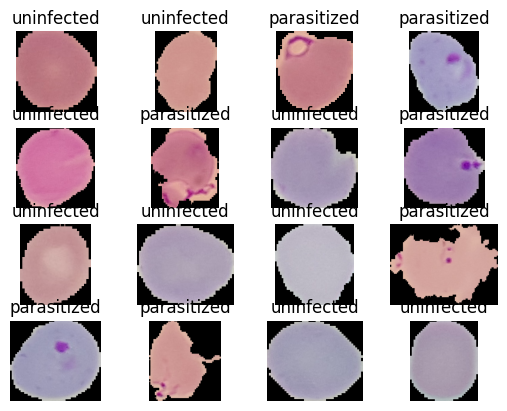

In [ ]:
for i, (image, label) in enumerate(train_data.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [ ]:
IM_SIZE = 224
def resizing(image, label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0, label

In [ ]:
train_data = train_data.map(resizing)
val_data = val_data.map(resizing)
test_data = test_data.map(resizing)

In [ ]:
for image,label in train_data.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
BATCH_SIZE = 32
train_data = train_data.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_data = val_data.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
lenet_model = tf.keras.Sequential([InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
                             Conv2D(filters = 6, kernel_size = 3, strides=1, padding='valid', activation='relu'),
                             BatchNormalisation(),
                             MaxPool2D(pool_size = 2,strides=2),

                             Conv2D(filters = 16, kernel_size = 3, strides=1, padding='valid', activation='relu'),
                             BatchNormalisation(),
                             MaxPool2D(pool_size = 2,strides=2),
                             Flatten(),
                             Dense(100, activation='relu'),
                             BatchNormalisation(),
                             Dense(10, activation='relu'),
                             BatchNormalisation(),
                             Dense(1, activation='sigmoid')
                             ])
lenet_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       4,665,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,667,769 (17.81 MB)

 Trainable params: 4,667,769 (17.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lenet_model.compile(optimizer = Adam(learning_rate = 0.01),
              loss =BinaryCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
history = lenet_model.fit(train_data,validation_data=val_data, epochs=20, verbose=1)

Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.4987 - loss: 0.6935 - val_accuracy: 0.4929 - val_loss: 0.6936
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.4966 - loss: 0.6935 - val_accuracy: 0.4936 - val_loss: 0.6936
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.4985 - loss: 0.6934 - val_accuracy: 0.4947 - val_loss: 0.6935
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.4971 - loss: 0.6934 - val_accuracy: 0.4944 - val_loss: 0.6936
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.4985 - loss: 0.6935 - val_accuracy: 0.4944 - val_loss: 0.6935
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - accuracy: 0.4988 - loss: 0.6934 - val_accuracy: 0.4929 - val_loss: 0.6936
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.4962 - loss: 0.6935 - val_accuracy: 0.4947 - val_loss: 0.6934
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.5003 - loss: 0.6934 - 

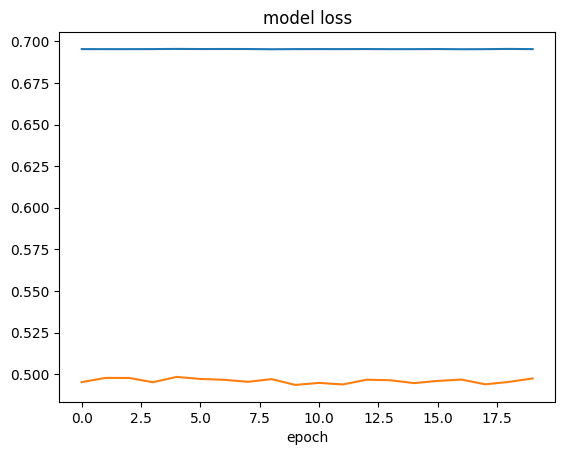

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.show()